In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sb
plt.rcParams['figure.figsize'] = 8, 4

In [2]:
%matplotlib inline

In [3]:
df = pd.read_json(open('nobel_winners_cleaned.json'))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        858 non-null    object
 1   country         858 non-null    object
 2   date_of_birth   858 non-null    object
 3   date_of_death   559 non-null    object
 4   gender          858 non-null    object
 5   link            858 non-null    object
 6   name            858 non-null    object
 7   place_of_birth  831 non-null    object
 8   place_of_death  524 non-null    object
 9   text            858 non-null    object
 10  year            858 non-null    int64 
 11  award_age       858 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 80.6+ KB


In [5]:
df.date_of_birth = pd.to_datetime(df.date_of_birth)
df.date_of_death = pd.to_datetime(df.date_of_death)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   category        858 non-null    object             
 1   country         858 non-null    object             
 2   date_of_birth   858 non-null    datetime64[ns, UTC]
 3   date_of_death   559 non-null    datetime64[ns, UTC]
 4   gender          858 non-null    object             
 5   link            858 non-null    object             
 6   name            858 non-null    object             
 7   place_of_birth  831 non-null    object             
 8   place_of_death  524 non-null    object             
 9   text            858 non-null    object             
 10  year            858 non-null    int64              
 11  award_age       858 non-null    int64              
dtypes: datetime64[ns, UTC](2), int64(2), object(8)
memory usage: 80.6+ KB


<Axes: xlabel='gender'>

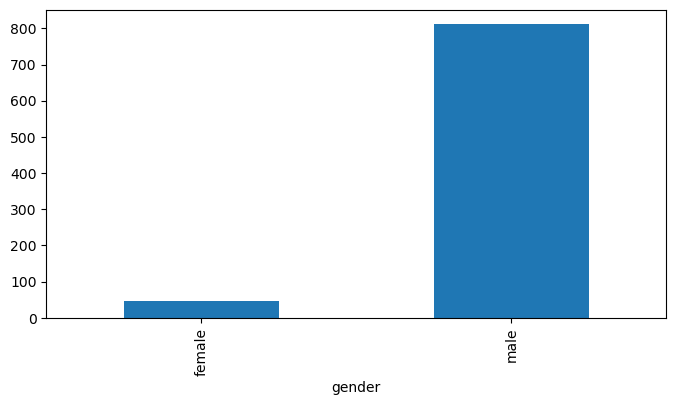

In [7]:
by_gender = df.groupby('gender')
by_gender.size().plot(kind='bar')

In [8]:
by_gender.size()

gender
female     47
male      811
dtype: int64

In [9]:
by_cat_gen = df.groupby(['category', 'gender'])
by_cat_gen.get_group(('Physics', 'female'))[['name', 'year']]

,name,year
267,Maria Goeppert-Mayer,1963
614,Marie Skłodowska-Curie,1903


In [10]:
by_cat_gen.size()

category                gender
Chemistry               female      4
                        male      167
Economics               female      1
                        male       74
Literature              female     13
                        male       93
Peace                   female     16
                        male       87
Physics                 female      2
                        male      199
Physiology or Medicine  female     11
                        male      191
dtype: int64

<Axes: ylabel='category,gender'>

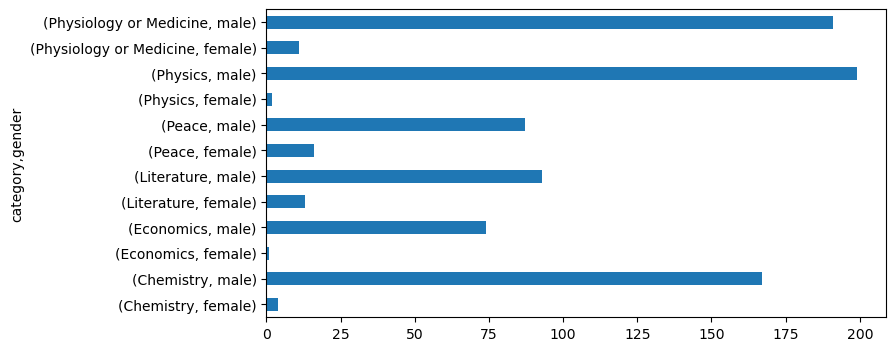

In [11]:
by_cat_gen.size().plot(kind='barh')

<Axes: ylabel='category'>

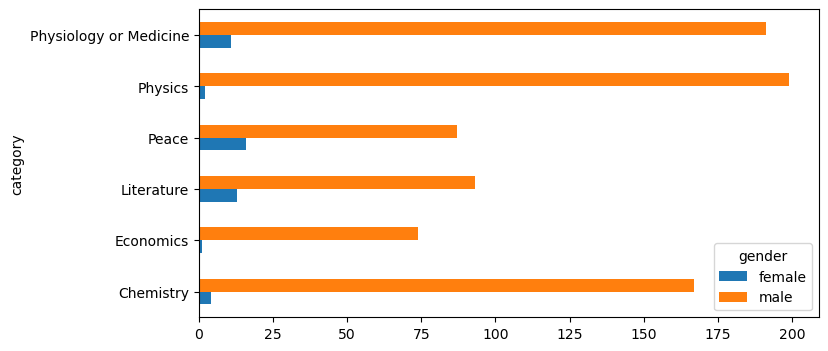

In [12]:
by_cat_gen.size().unstack().plot(kind='barh')

<Axes: ylabel='category'>

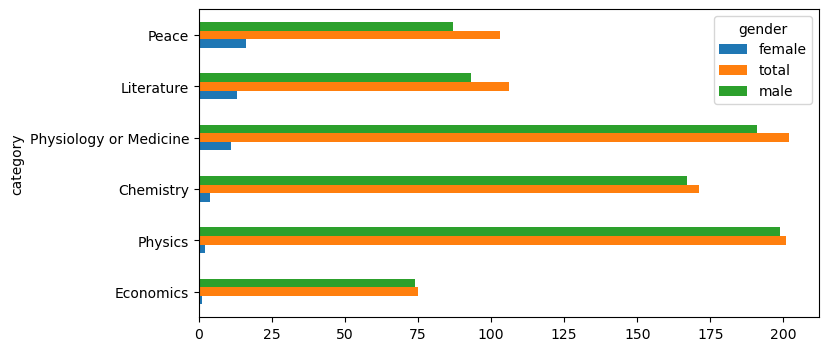

In [13]:
cat_gen_sz = by_cat_gen.size().unstack()
cat_gen_sz['total'] = cat_gen_sz.sum(axis=1)
cat_gen_sz = cat_gen_sz.sort_values(by='female',ascending=True)
cat_gen_sz[['female','total','male']].plot(kind='barh')

In [14]:
df[(df.category == 'Physics') & (df.gender == 'female')]\
[['name', 'country','year']]

,name,country,year
267,Maria Goeppert-Mayer,United States,1963
614,Marie Skłodowska-Curie,Poland,1903


<Axes: xlabel='year'>

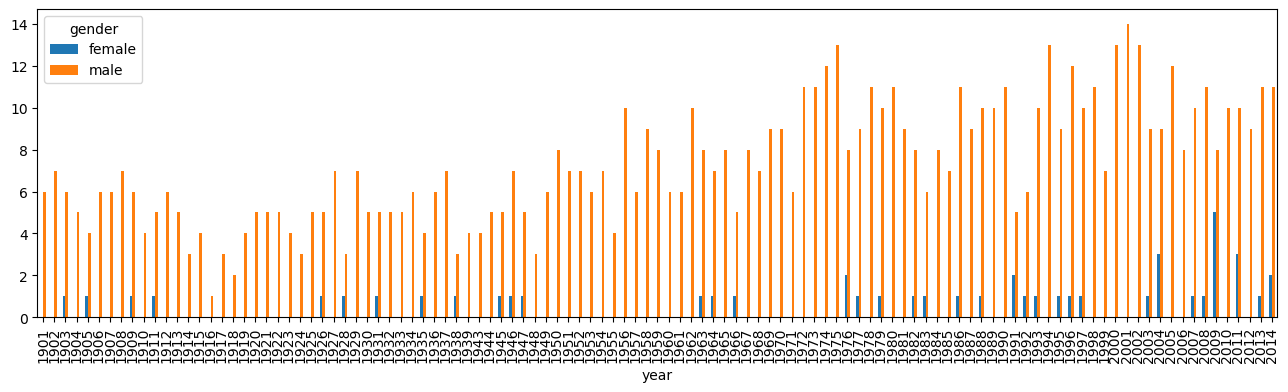

In [15]:
by_year_gender = df.groupby(['year','gender'])
year_gen_sz = by_year_gender.size().unstack()
year_gen_sz.plot(kind='bar', figsize=(16,4))

In [16]:
def thin_xticks(ax, tick_gap=10, rotation=45):
    """ Thin x-ticks and adjust rotation """
    ticks = ax.xaxis.get_ticklocs()
    ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
    ax.xaxis.set_ticks(ticks[::tick_gap])
    ax.xaxis.set_ticklabels(ticklabels[::tick_gap], rotation=rotation)
    ax.figure.show()

In [17]:
by_year_gender = df.groupby(['year', 'gender'])
by_year_gender.size().unstack()

gender,female,male
year,,
1901,NaN,6.0
1902,NaN,7.0
1903,1.0,6.0
1904,NaN,5.0
1905,1.0,4.0
...,...,...
2010,NaN,10.0
2011,3.0,10.0
2012,NaN,9.0


In [18]:
new_index = pd.Index(np.arange(1901, 2015), name='year')
by_year_gender = df.groupby(['year','gender'])
year_gen_sz = by_year_gender.size().unstack().reindex(new_index)

Text(0.5, 0, 'Year')

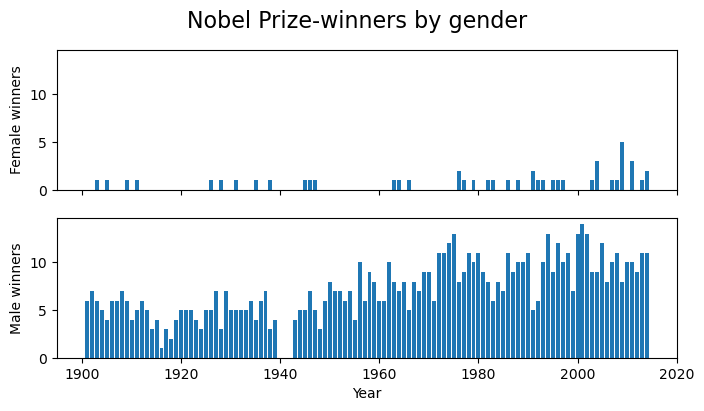

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1,
sharex=True, sharey=True)
ax_f = axes[0]
ax_m = axes[1]
fig.suptitle('Nobel Prize-winners by gender', fontsize=16)
ax_f.bar(year_gen_sz.index, year_gen_sz.female)
ax_f.set_ylabel('Female winners')
ax_m.bar(year_gen_sz.index, year_gen_sz.male)
ax_m.set_ylabel('Male winners')
ax_m.set_xlabel('Year')

<Axes: xlabel='country'>

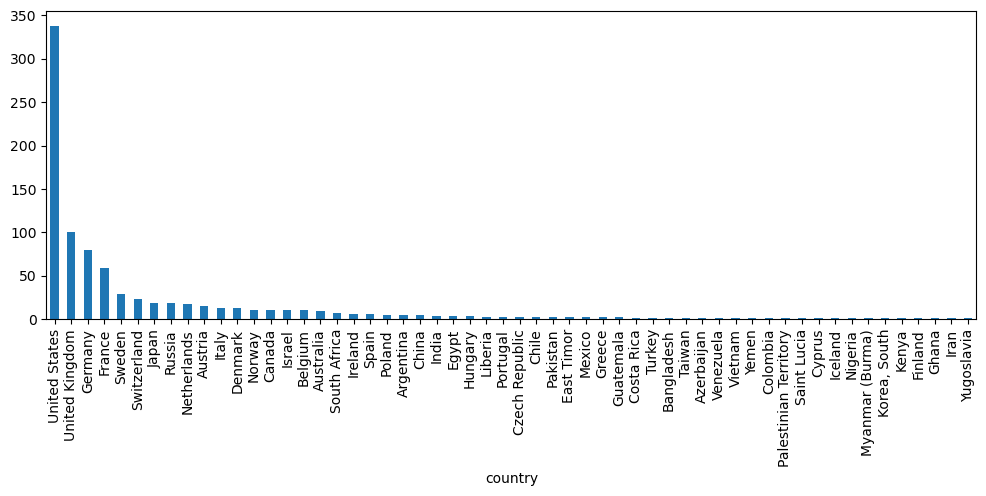

In [20]:
df.groupby('country').size().sort_values(ascending=False).plot(kind='bar', figsize=(12,4))

In [21]:
nat_group = df.groupby('country')
ngsz = nat_group.size()
ngsz.index

Index(['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belgium', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Cyprus', 'Czech Republic', 'Denmark', 'East Timor', 'Egypt', 'Finland',
       'France', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hungary',
       'Iceland', 'India', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kenya', 'Korea, South', 'Liberia', 'Mexico', 'Myanmar (Burma)',
       'Netherlands', 'Nigeria', 'Norway', 'Pakistan', 'Palestinian Territory',
       'Poland', 'Portugal', 'Russia', 'Saint Lucia', 'South Africa', 'Spain',
       'Sweden', 'Switzerland', 'Taiwan', 'Turkey', 'United Kingdom',
       'United States', 'Venezuela', 'Vietnam', 'Yemen', 'Yugoslavia'],
      dtype='object', name='country')

In [22]:
df_countries = pd.read_json('winning_country_data.json', orient='index')
df_countries.iloc[0]

gini                  39.0
name                Turkey
alpha3Code             TUR
area              783562.0
latlng        [39.0, 35.0]
capital             Ankara
population        76667864
Name: Turkey, dtype: object

<Axes: xlabel='name'>

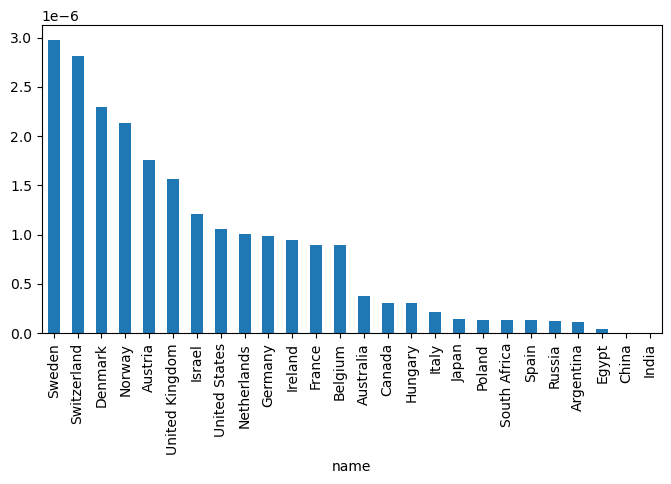

In [23]:
df_countries = df_countries.set_index('name')
df_countries['nobel_wins'] = ngsz
df_countries['nobel_wins_per_capita'] =df_countries.nobel_wins / df_countries.population
df_countries[df_countries.nobel_wins > 2].sort_values(by='nobel_wins_per_capita', ascending=False).nobel_wins_per_capita.plot(kind='bar')

In [24]:
nat_cat_sz = df.groupby(['country', 'category']).size().unstack()
nat_cat_sz.sample(2)

category,Chemistry,Economics,Literature,Peace,Physics,Physiology or Medicine
country,,,,,,
Myanmar (Burma),NaN,NaN,NaN,1.0,NaN,NaN
Japan,5.0,NaN,2.0,1.0,8.0,2.0


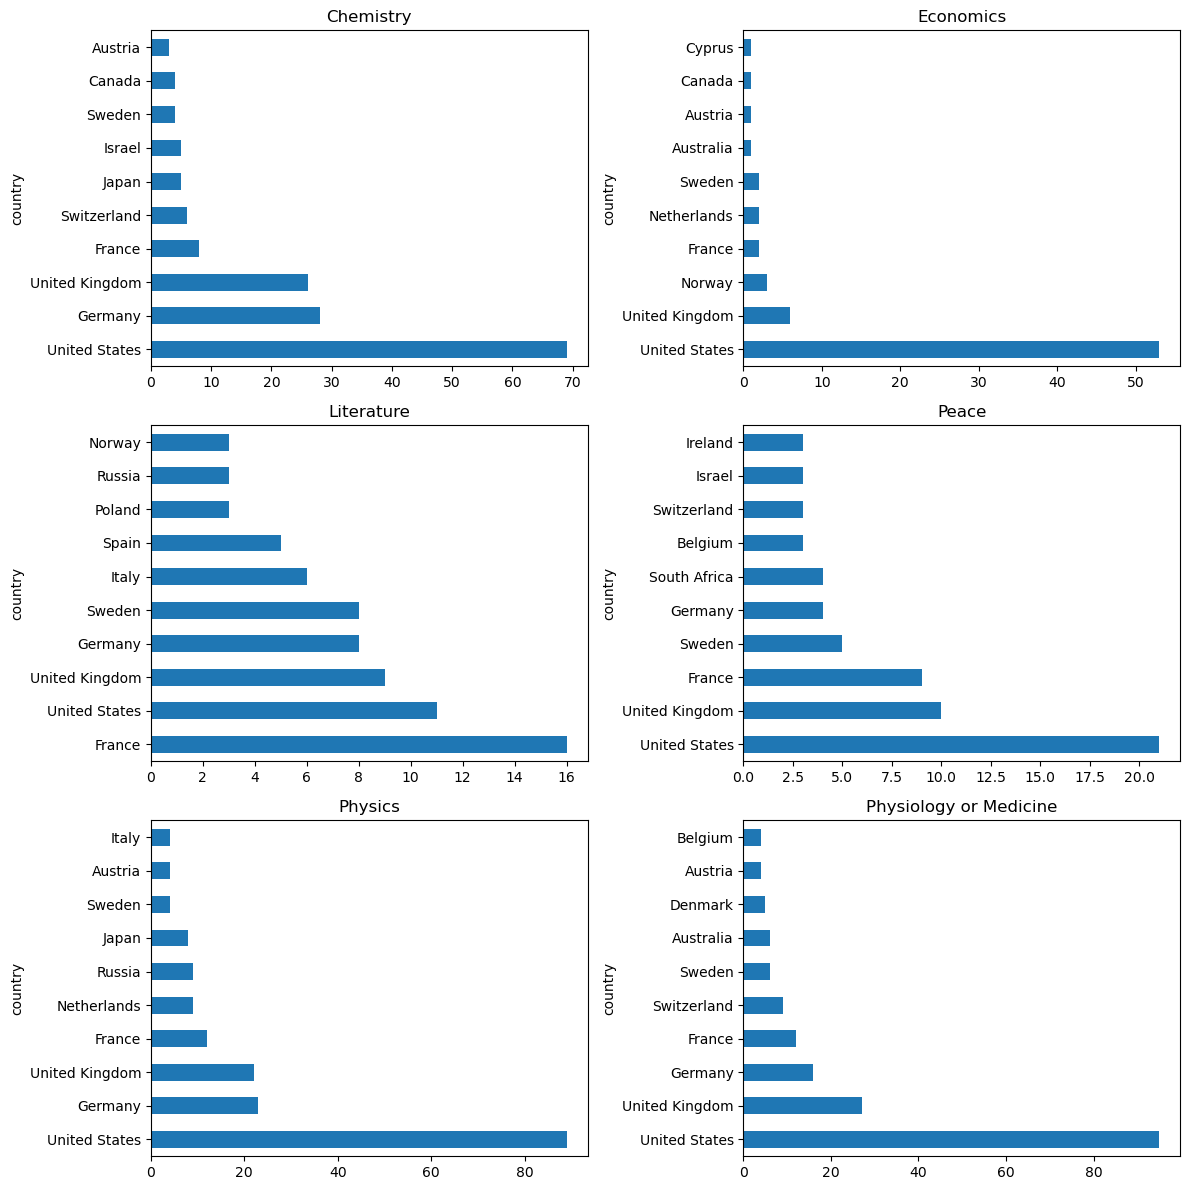

In [25]:
COL_NUM = 2
ROW_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))
for i, (label, col) in enumerate(nat_cat_sz.items()):
    ax = axes[i//COL_NUM, i%COL_NUM]
    col = col.sort_values(ascending=False)[:10]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
plt.tight_layout()

In [26]:
plt.rcParams['font.size']=20

In [27]:
new_index = pd.Index(np.arange(1901, 2015), name='year')
by_year_nat_sz = df.groupby(['year', 'country']).size().unstack().reindex(new_index)

<Axes: xlabel='year'>

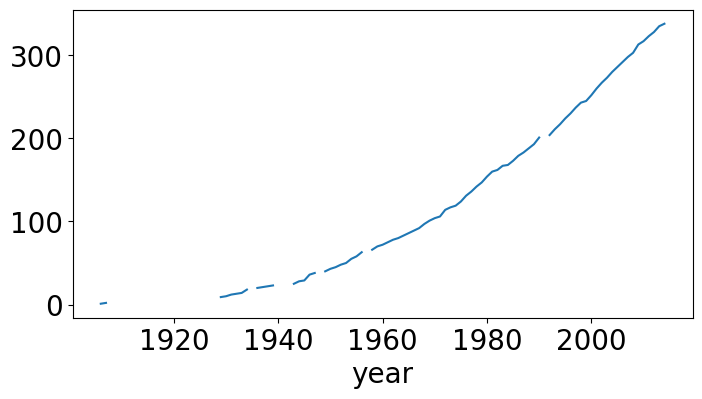

In [28]:
by_year_nat_sz['United States'].cumsum().plot()

<Axes: xlabel='year'>

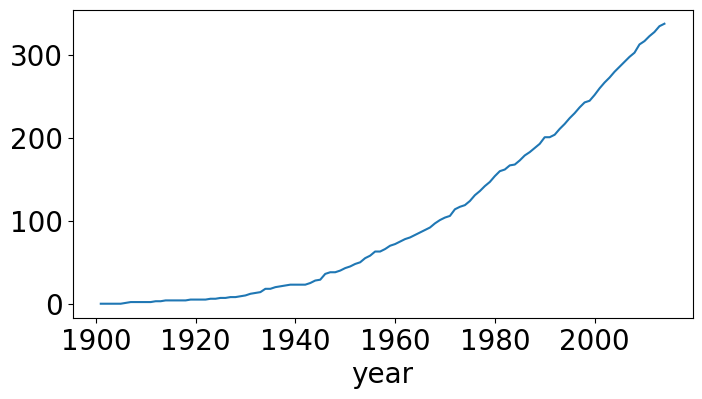

In [29]:
by_year_nat_sz['United States'].fillna(0).cumsum().plot()

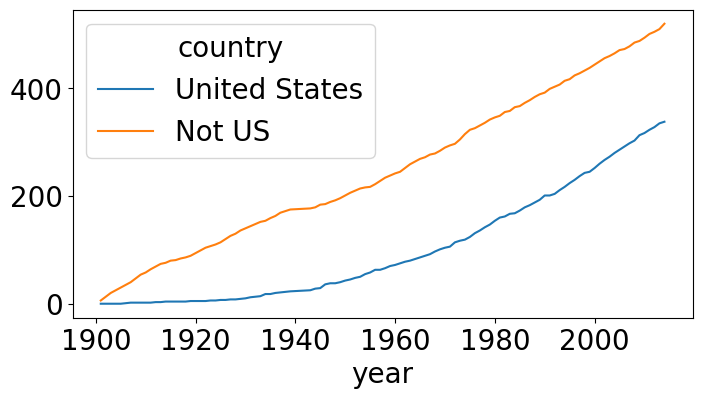

In [30]:
by_year_nat_sz = df.groupby(['year', 'country']).size().unstack().fillna(0)
not_US = by_year_nat_sz.columns.tolist()
not_US.remove('United States')
by_year_nat_sz['Not US'] = by_year_nat_sz[not_US].sum(axis=1)
ax = by_year_nat_sz[['United States', 'Not US']].cumsum().plot()

<Axes: xlabel='year'>

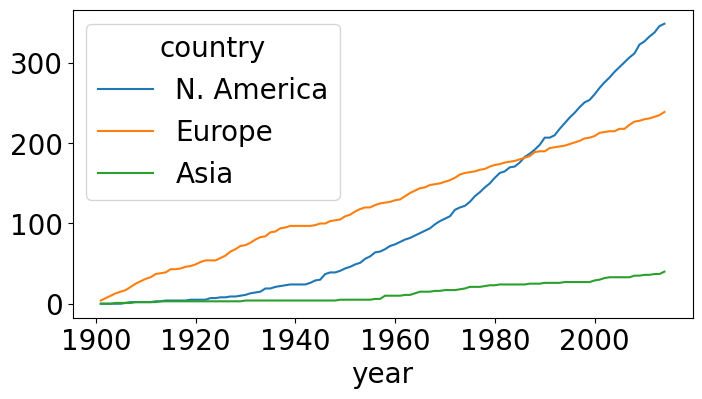

In [31]:
by_year_nat_sz = df.groupby(['year', 'country'])\
.size().unstack().reindex(new_index).fillna(0)

regions = [
{'label':'N. America',
'countries':['United States', 'Canada']},
{'label':'Europe',
'countries':['United Kingdom', 'Germany', 'France']},
{'label':'Asia',
'countries':['Japan', 'Russia', 'India']}
]

for region in regions:
    by_year_nat_sz[region['label']] =\
    by_year_nat_sz[region['countries']].sum(axis=1)
    
by_year_nat_sz[[r['label'] for r in regions]].cumsum().plot()

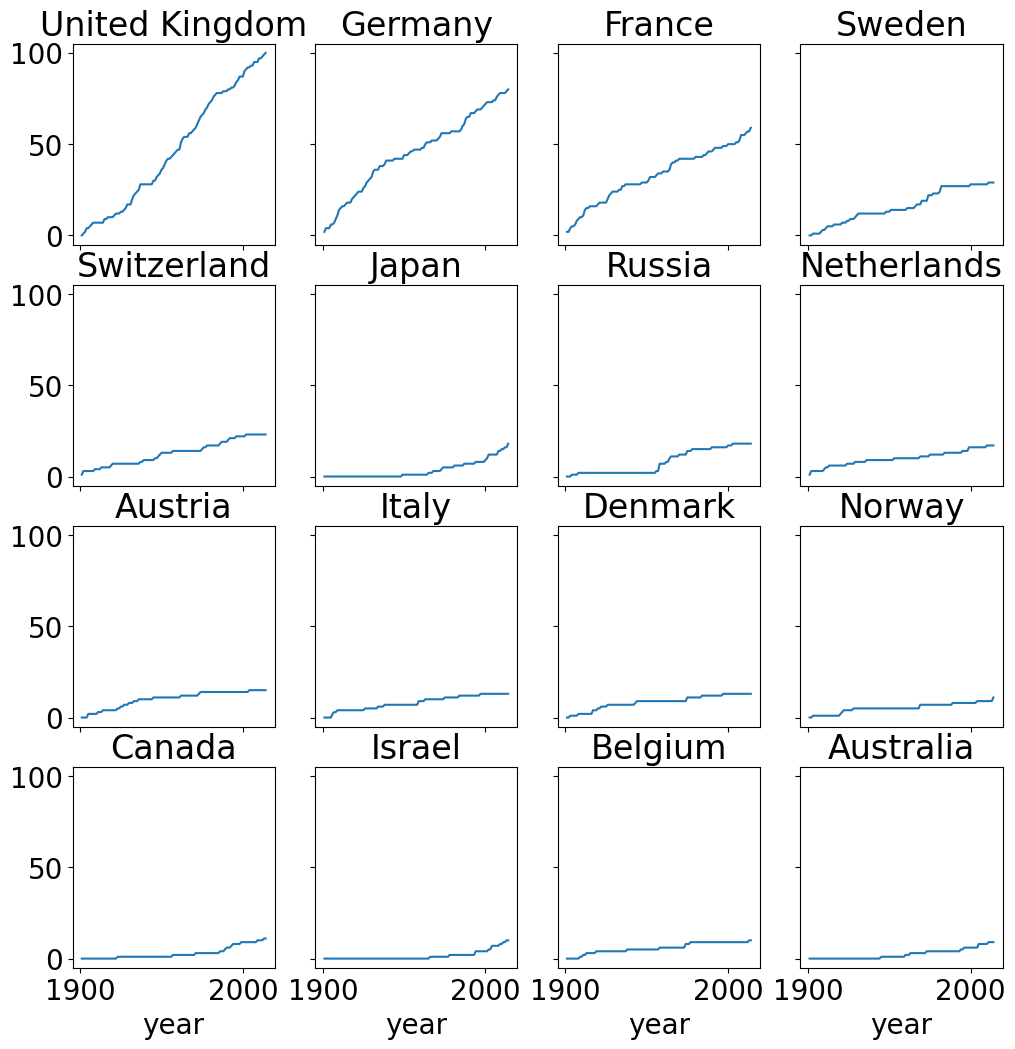

In [32]:
COL_NUM = 4 
ROW_NUM = 4

by_nat_sz = df.groupby('country').size()
by_nat_sz.sort_values(ascending=False, inplace=True)
fig, axes = plt.subplots(COL_NUM, ROW_NUM,\
sharex=True, sharey=True,
figsize=(12,12))
for i, nat in enumerate(by_nat_sz.index[1:17]):
    ax = axes[i//COL_NUM, i%ROW_NUM]
    by_year_nat_sz[nat].cumsum().plot(ax=ax)
    ax.set_title(nat)

<Axes: >

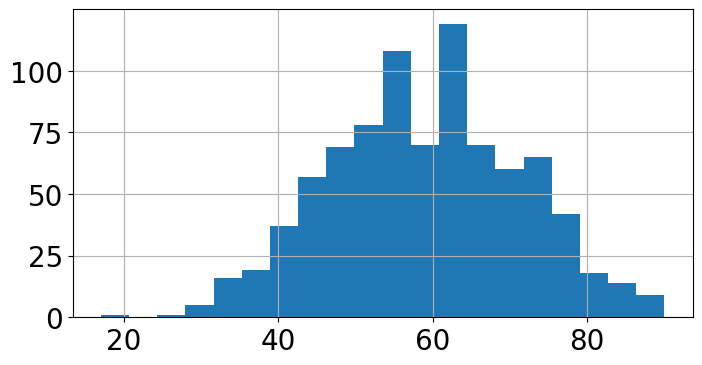

In [33]:
df['award_age'].hist(bins=20)

C:\Users\masami\AppData\Local\Temp\ipykernel_8608\3901563649.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['award_age'])
C:\Users\masami\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='award_age', ylabel='Density'>

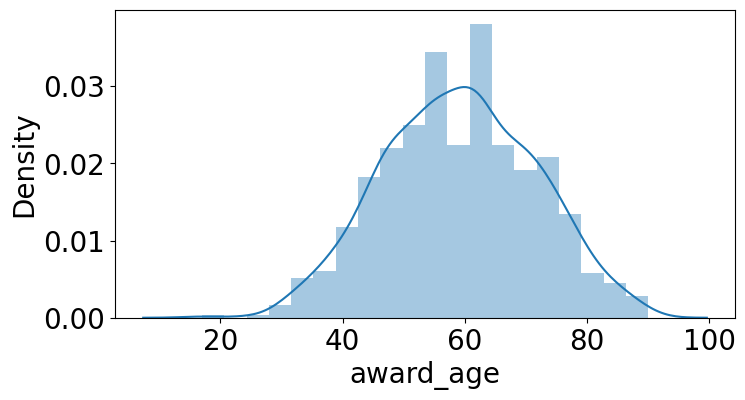

In [34]:
import seaborn as sns
sns.distplot(df['award_age'])

<Axes: xlabel='gender', ylabel='award_age'>

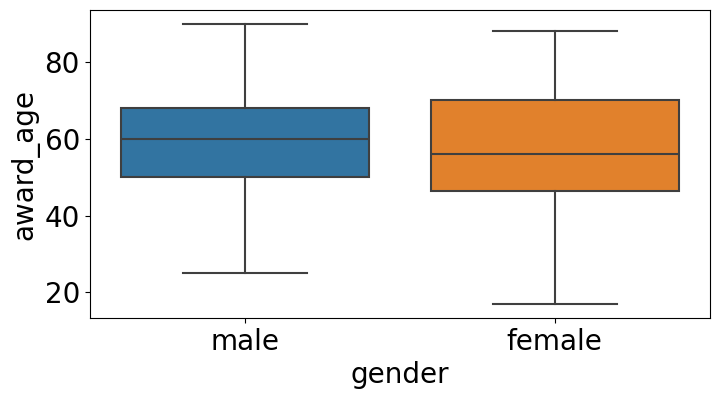

In [35]:
sns.boxplot(data = df,x=df.gender,y=df.award_age)

<Axes: xlabel='gender', ylabel='award_age'>

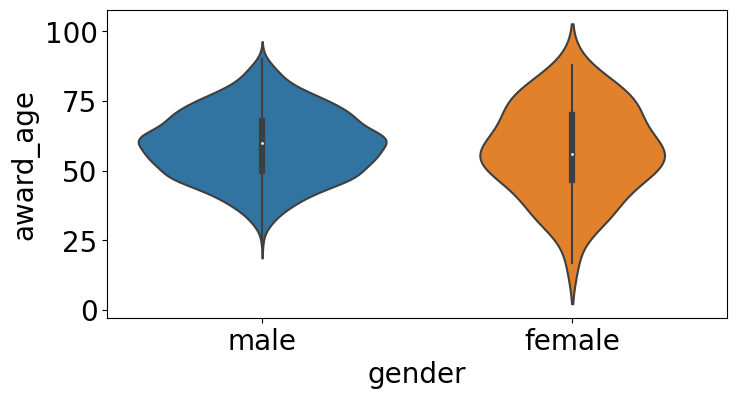

In [36]:
sns.violinplot(data =df, x= df.gender, y=df.award_age)

C:\Users\masami\AppData\Local\Temp\ipykernel_8608\2470395908.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age_at_death, bins=40)
C:\Users\masami\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age_at_death', ylabel='Density'>

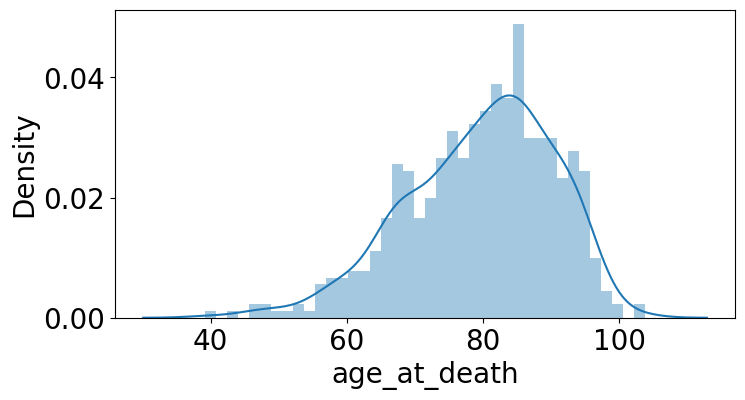

In [37]:
df['age_at_death'] = (df.date_of_death - df.date_of_birth).dt.days/365
age_at_death = df[df.age_at_death.notnull()].age_at_death
sns.distplot(age_at_death, bins=40)

In [38]:
df[df.age_at_death > 100][['name', 'category', 'year']]

,name,category,year
101,Ronald Coase,Economics,1991
329,Rita Levi-Montalcini,Physiology or Medicine,1986


C:\Users\masami\AppData\Local\Temp\ipykernel_8608\3764661165.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[(df2.gender == 'male')].age_at_death, shade=True, label='male')
C:\Users\masami\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\masami\AppData\Local\Temp\ipykernel_8608\3764661165.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[(df2.gender == 'female')].age_at_death, shade=True, label='female')
C:\Users\masami\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

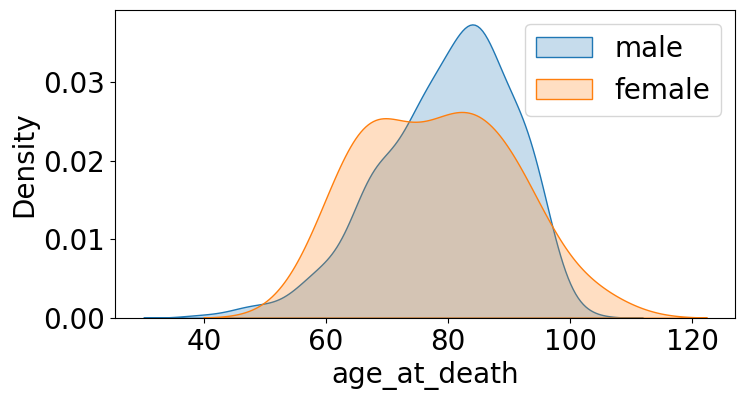

In [39]:
df2 = df[df.age_at_death.notnull()]
sns.kdeplot(df2[(df2.gender == 'male')].age_at_death, shade=True, label='male')
sns.kdeplot(df2[(df2.gender == 'female')].age_at_death, shade=True, label='female')
plt.legend()

<Axes: xlabel='gender', ylabel='age_at_death'>

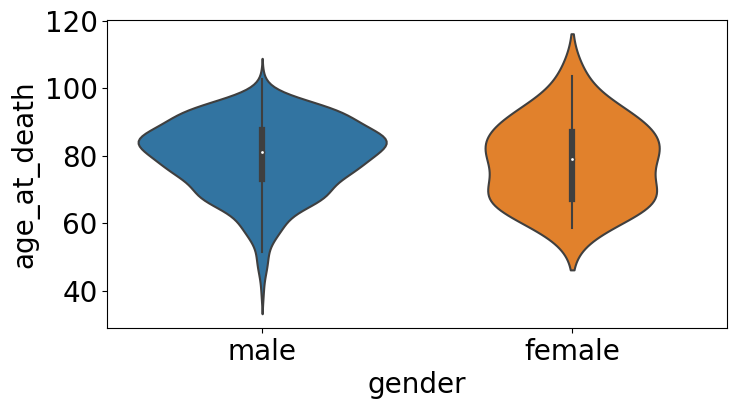

In [40]:
sns.violinplot(data=df,x=df.gender, y=age_at_death)

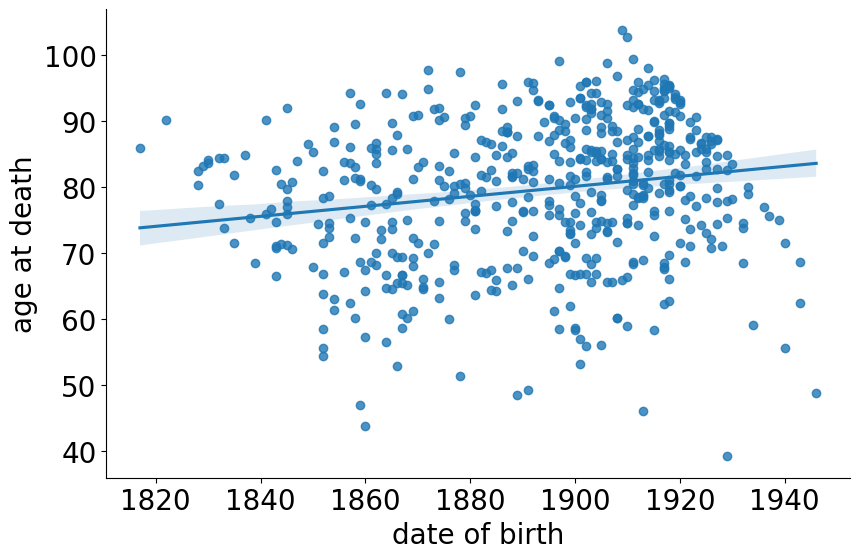

In [41]:
df_temp=df[df.age_at_death.notnull()]
data = pd.DataFrame(
{'age at death':df_temp.age_at_death,
'date of birth':df_temp.date_of_birth.dt.year})
sns.lmplot(x='date of birth', y='age at death', data = data, height=6, aspect=1.5)

In [42]:
df = pd.read_json('nobel_winners_plus_bornin.json', orient='records')

Text(0.5, 1.0, 'The Nobel Diaspora')

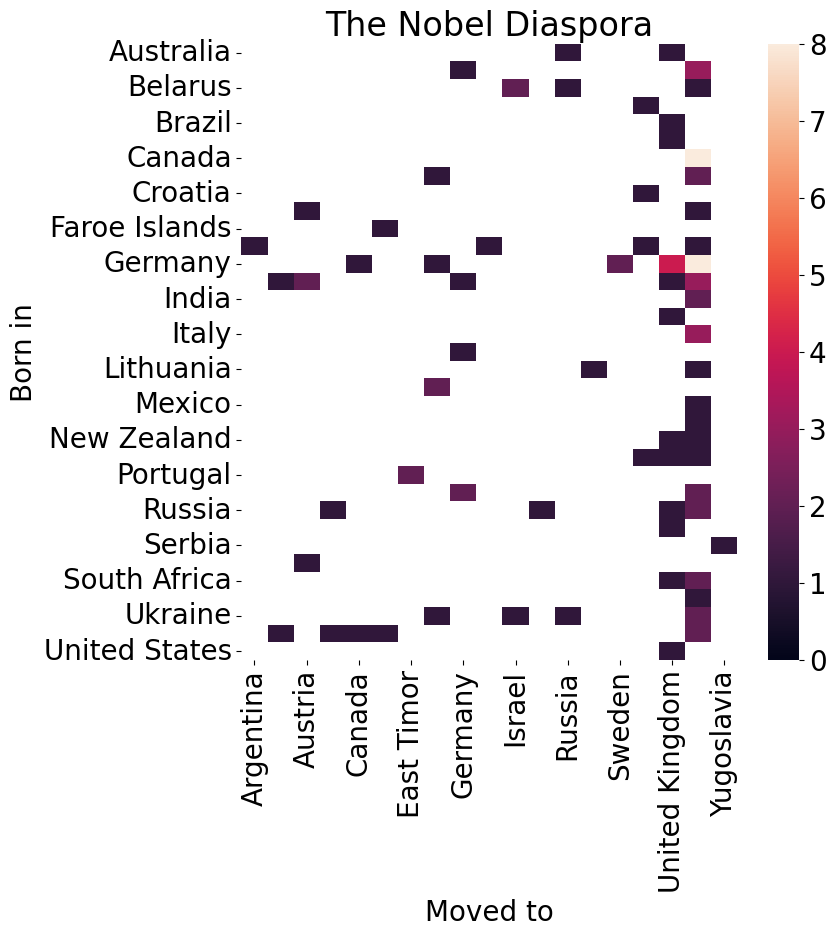

In [43]:
by_bornin_nat = df[df.born_in.notnull()].groupby(\
['born_in', 'country']).size().unstack()
by_bornin_nat.index.name = 'Born in'
by_bornin_nat.columns.name = 'Moved to'
plt.figure(figsize=(8,8))
ax = sns.heatmap(by_bornin_nat, vmin=0, vmax=8)
ax.set_title('The Nobel Diaspora')